In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
import numpy as np
import matplotlib.pyplot as plt
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "/Users/yhhan/temp3"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n_sgd = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_momentum = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Momentum.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_nag = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.NAG.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adagrad = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.AdaGrad.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adam = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: 92G5ZX44
Multi Layer Network Model - ID: 08EGEANR
Multi Layer Network Model - ID: HZHE7ARL
Multi Layer Network Model - ID: KFP2JSS6
Multi Layer Network Model - ID: IX939HK5


In [3]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [4]:
batch_size = 1000
max_epoch = 50

neural_networks = {"SGD": n_sgd, "Momentum": n_momentum, "Nesterov": n_nag, "AdaGrad": n_adagrad, "Adam": n_adam}
#neural_networks = {"AdaGrad": n_adagrad, "Adam": n_adam}

for key, neural_network in neural_networks.items():
    print("***" + key + "***")
    neural_network.learning(
        max_epoch=max_epoch, 
        data=data, 
        batch_size=batch_size, 
        print_period=1, 
        is_numba=True, 
        verbose=False
    )

***SGD***
-- Learning Started --
Epoch   0 Completed - Train Error: 2.314397 - Validation Error: 2.312220 - Test Accuracy: 0.096200
Save Params at Epoch: 0
Epoch   1 Completed - Train Error: 0.437363 - Validation Error: 0.400070 - Test Accuracy: 0.881500
Save Params at Epoch: 1
Epoch   2 Completed - Train Error: 0.310399 - Validation Error: 0.267490 - Test Accuracy: 0.922100
Save Params at Epoch: 2
Epoch   3 Completed - Train Error: 0.242563 - Validation Error: 0.216566 - Test Accuracy: 0.935900
Save Params at Epoch: 3
Epoch   4 Completed - Train Error: 0.225571 - Validation Error: 0.185441 - Test Accuracy: 0.944500
Save Params at Epoch: 4
Epoch   5 Completed - Train Error: 0.207170 - Validation Error: 0.163661 - Test Accuracy: 0.950900
Save Params at Epoch: 5
Epoch   6 Completed - Train Error: 0.135084 - Validation Error: 0.147634 - Test Accuracy: 0.954200
Save Params at Epoch: 6
Epoch   7 Completed - Train Error: 0.155050 - Validation Error: 0.135237 - Test Accuracy: 0.959200
Save Pa

In [5]:
for key, neural_network in neural_networks.items():
    print("{:10s} - Epoch:{:3d}, Min Train Error: {:7.5f}, Min ValidationError: {:7.5f}, Max Test Accuracy: {:7.5f}".format(
        key, 
        neural_networks[key].min_validation_error_epoch,
        neural_networks[key].min_train_error,
        neural_networks[key].min_validation_error,
        neural_networks[key].max_test_accuracy,
        )
    )

SGD        - Epoch: 32, Min Train Error: 0.03155, Min ValidationError: 0.07531, Max Test Accuracy: 0.97760
Momentum   - Epoch: 15, Min Train Error: 0.04303, Min ValidationError: 0.11310, Max Test Accuracy: 0.96950
Nesterov   - Epoch:  8, Min Train Error: 0.06076, Min ValidationError: 0.09811, Max Test Accuracy: 0.96940
AdaGrad    - Epoch: 16, Min Train Error: 0.03401, Min ValidationError: 0.09017, Max Test Accuracy: 0.97270
Adam       - Epoch:  6, Min Train Error: 0.17481, Min ValidationError: 0.19972, Max Test Accuracy: 0.94490


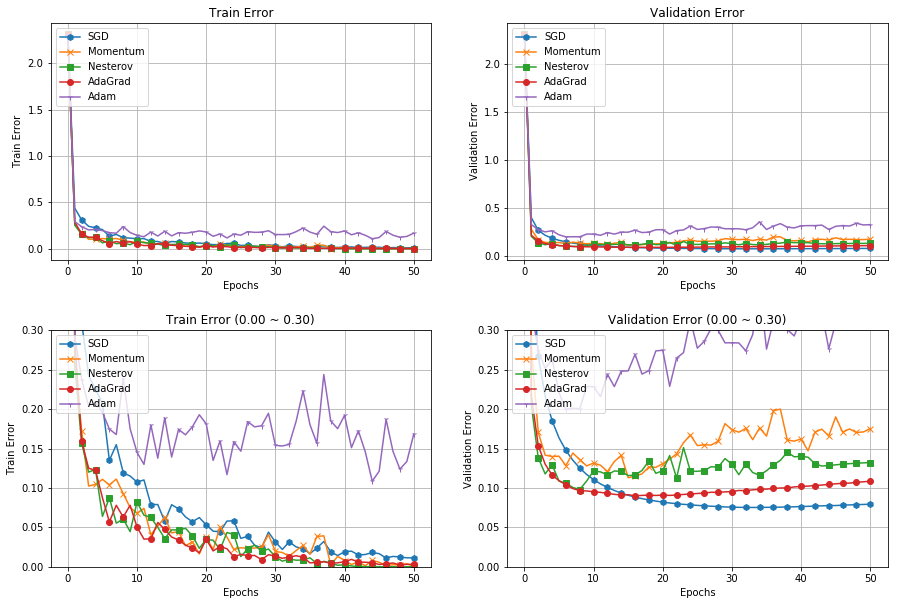

In [6]:
markers = {"SGD": "h", "Momentum": "x", "Nesterov": "s", "AdaGrad": "o", "Adam": "1"}
epoch_list = np.arange(max_epoch + 1)

f, axarr = plt.subplots(2, 2, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 0].set_ylabel('Train Error')
axarr[0, 0].set_xlabel('Epochs')
axarr[0, 0].grid(True)
axarr[0, 0].set_title('Train Error')
axarr[0, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 1].set_ylabel('Validation Error')
axarr[0, 1].set_xlabel('Epochs')
axarr[0, 1].grid(True)
axarr[0, 1].set_title('Validation Error')
axarr[0, 1].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 0].set_ylabel('Train Error')
axarr[1, 0].set_xlabel('Epochs')
axarr[1, 0].grid(True)
axarr[1, 0].set_ylim(0, 0.3)
axarr[1, 0].set_title('Train Error (0.00 ~ 0.30)')
axarr[1, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 1].set_ylabel('Validation Error')
axarr[1, 1].set_xlabel('Epochs')
axarr[1, 1].grid(True)
axarr[1, 1].set_ylim(0, 0.3)
axarr[1, 1].set_title('Validation Error (0.00 ~ 0.30)')
axarr[1, 1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)

plt.show()

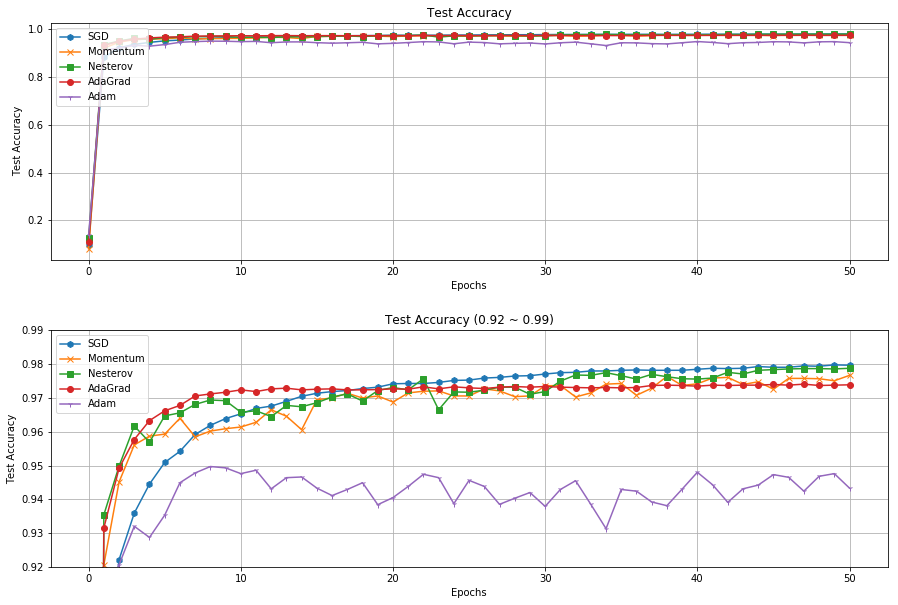

In [12]:
f, axarr = plt.subplots(2, 1, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[0].set_ylabel('Test Accuracy')
axarr[0].set_xlabel('Epochs')
axarr[0].grid(True)
axarr[0].set_title('Test Accuracy')
axarr[0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[1].set_ylabel('Test Accuracy')
axarr[1].set_xlabel('Epochs')
axarr[1].grid(True)
axarr[1].set_ylim(0.92, 0.99)
axarr[1].set_title('Test Accuracy (0.92 ~ 0.99)')
axarr[1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)
plt.show()